In [134]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import plotly as py
py.offline.init_notebook_mode()
import psycopg2
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import seaborn as sbn
import matplotlib.patches as mpatches
from sklearn.cluster import KMeans
from sklearn import metrics



In [6]:
sc2 = pd.read_csv("starcraft_original_data.csv")

In [7]:
sc2=sc2[:3340]
sc2.head()

GameID  LeagueIndex   Age  HoursPerWeek  TotalHours       APM  \
0    52.0          5.0  27.0          10.0      3000.0  143.7180   
1    55.0          5.0  23.0          10.0      5000.0  129.2322   
2    56.0          4.0  30.0          10.0       200.0   69.9612   
3    57.0          3.0  19.0          20.0       400.0  107.6016   
4    58.0          3.0  32.0          10.0       500.0  122.8908   

   SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  MinimapAttacks  \
0         0.003515         0.000220       0.000055        0.000110   
1         0.003304         0.000259       0.000069        0.000294   
2         0.001101         0.000336       0.000042        0.000294   
3         0.001034         0.000213       0.000011        0.000053   
4         0.001136         0.000327       0.000039        0.000000   

       ...       NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
0      ...           0.004849         32.6677        40.8673        4.7508   
1      ...           0.004307         32.9194        42.3454        4.8434   
2      ...           0.002926         44.6475        75.3548        4.0430   
3      ...           0.003783         29.2203        53.7352        4.9155   
4      ...           0.002368         22.6885        62.0813        9.3740   

   TotalMapExplored  WorkersMade  UniqueUnitsMade  ComplexUnitsMade  \
0          0.000220     0.001397         0.000047               0.0   
1          0.000381     0.001194         0.000087               0.0   
2          0.000231     0.000745         0.000063               0.0   
3          0.000202     0.000426         0.000075               0.0   
4          0.000289     0.001174         0.000077               0.0   

   ComplexAbilityUsed  MaxTimeStamp  
0            0.000000      127448.0  
1            0.000208       57812.0  
2            0.000189       95360.0  
3            0.000384       93852.0  
4            0.000019       51936.0  

[5 rows x 21 columns]

In [8]:
sc2 = sc2.dropna()


In [9]:

sc2_=sc2[:3040]
x = sc2_[['TotalHours','APM', 'HoursPerWeek', 'Age','SelectByHotkeys','LeagueIndex','AssignToHotkeys', 'MinimapAttacks','NumberOfPACs', 'GapBetweenPACs', 'ActionLatency','ActionsInPAC', 'TotalMapExplored', 'WorkersMade','UniqueUnitsMade']]
y = sc2_[['LeagueIndex']]


In [10]:
model = KMeans(n_clusters =7, max_iter = 1000)

In [11]:
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
colormap =np.array(['red', 'blue', 'yellow'])

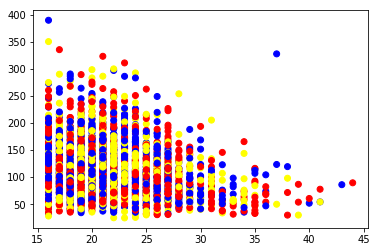

In [13]:
plt.scatter( x.Age, x.APM, c =colormap)

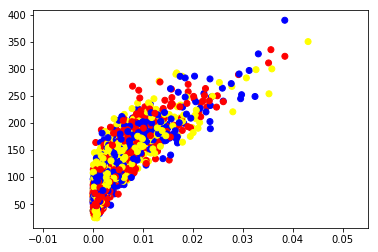

In [16]:

plt.scatter(x.SelectByHotkeys, x.APM, c=colormap)

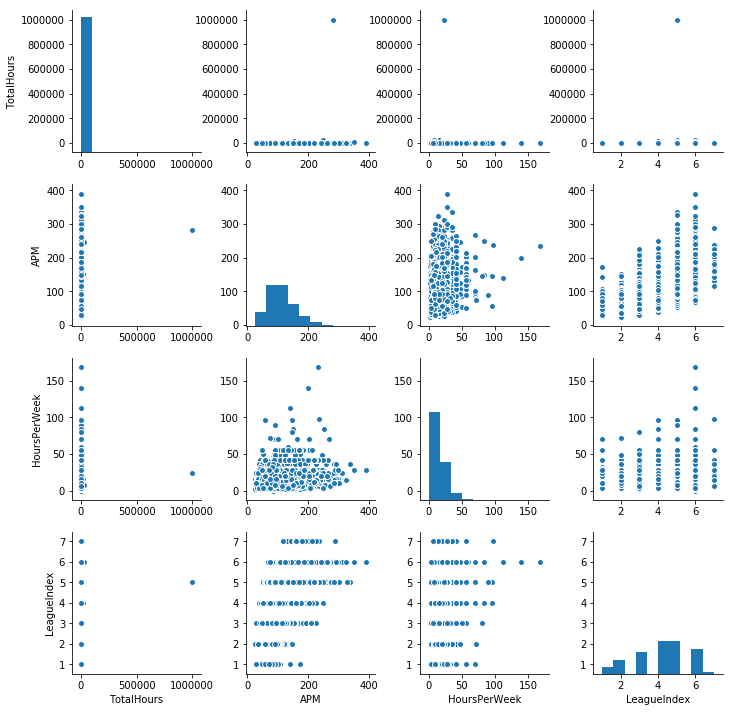

In [17]:
sbn.pairplot(sc2_[['TotalHours','APM', 'HoursPerWeek','LeagueIndex']])

# What is the typical player for each league index?

In [18]:
def line_mean_min_max(x,y,z):
    min_line_chart = sc2.groupby(x)[y].min()
    max_line_chart =sc2.groupby(x)[y].max()
    avg_line_chart =sc2.groupby(x)[y].mean()
    min_line_chart.plot(kind='line')
    max_line_chart.plot(kind='line')
    avg_line_chart.plot(kind='line', title =z)


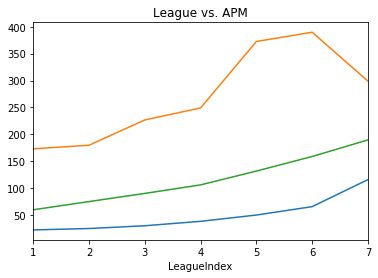

In [19]:
line_mean_min_max('LeagueIndex', 'APM','League vs. APM')

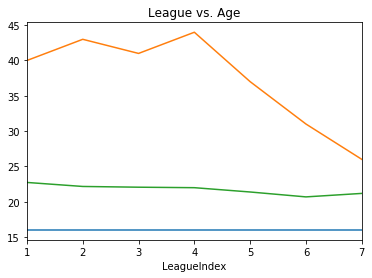

In [20]:
line_mean_min_max('LeagueIndex','Age','League vs. Age')

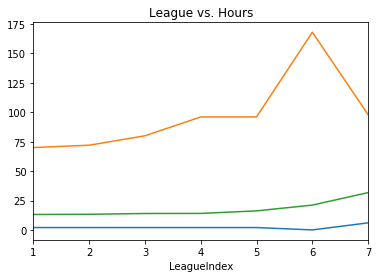

In [21]:
line_mean_min_max('LeagueIndex','HoursPerWeek','League vs. Hours')

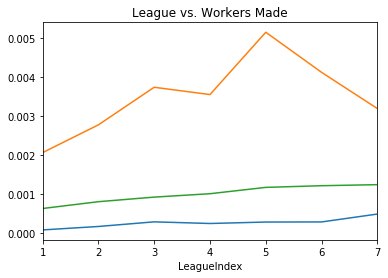

In [22]:
line_mean_min_max('LeagueIndex','WorkersMade','League vs. Workers Made')

In [129]:
unique = sc2.groupby('LeagueIndex')['UniqueHotkeys']
c =unique.mean()
select= sc2.groupby('LeagueIndex')['SelectByHotkeys']
b =select.mean()
assign = sc2.groupby('LeagueIndex')['AssignToHotkeys']
a = assign.mean()

data = {'Unique': [ 0.000045 ,0.000045, 0.000049 ,0.000053 ,0.000064 ,0.000074, 0.000080],
'Select': [ 0.0001081, 0.0001536, 0.0002188, 0.0003150,  0.0004980,  0.0007437,  0.0009418],
'Assign': [0.000185, 0.000222, 0.000282,0.000340, 0.000414, 0.000512 ,0.000723]}

revised = clean[['UniqueHotkeys','SelectByHotkeys', 'AssignToHotkeys']][:10]

fb= pd.DataFrame(data, columns=['Unique','Select','Assign'])


# What is the best indicator of League placement

Text(0,0.5,'HotkeyUsage')

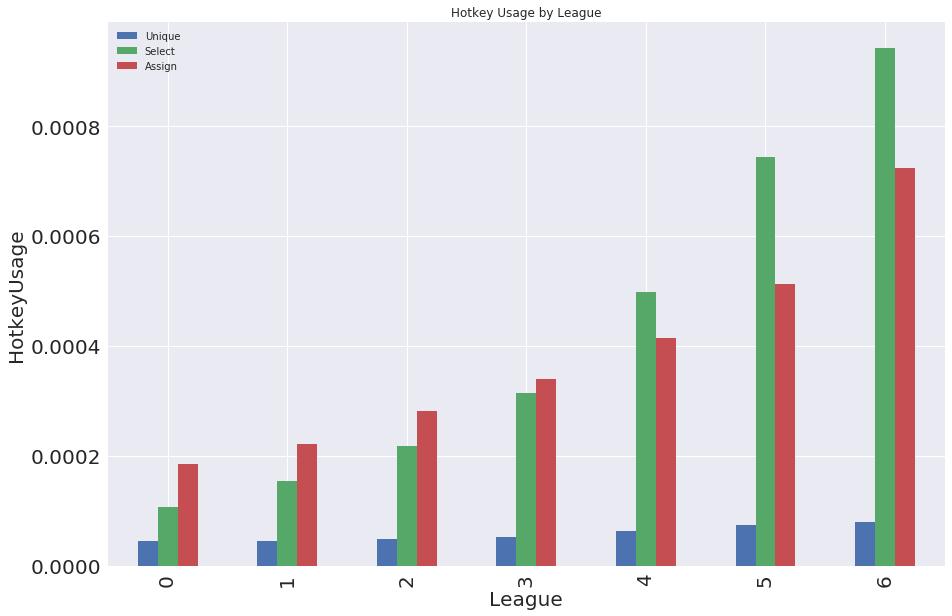

In [130]:
ax = fb.plot(kind='bar', title ="Hotkey Usage by League",figsize=(15,10),legend=True, fontsize=20)
ax.set_xlabel("League",fontsize=20)
ax.set_ylabel("HotkeyUsage",fontsize=20)

# Whats a good way to removed variability from the data set?

In [25]:
def box_and_whisker(a,b):
    sbn.boxplot(x = sc2[a], y = sc2[b])

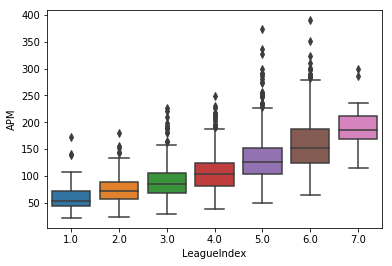

In [26]:
box_and_whisker('LeagueIndex', 'APM')

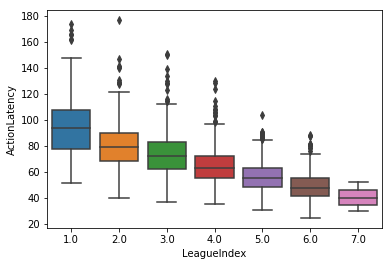

In [27]:
box_and_whisker('LeagueIndex', 'ActionLatency')

In [28]:
sc2[:1]

GameID  LeagueIndex   Age  HoursPerWeek  TotalHours      APM  \
0    52.0          5.0  27.0          10.0      3000.0  143.718   

   SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  MinimapAttacks  \
0         0.003515          0.00022       0.000055         0.00011   

       ...       NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
0      ...           0.004849         32.6677        40.8673        4.7508   

   TotalMapExplored  WorkersMade  UniqueUnitsMade  ComplexUnitsMade  \
0           0.00022     0.001397         0.000047               0.0   

   ComplexAbilityUsed  MaxTimeStamp  
0                 0.0      127448.0  

[1 rows x 21 columns]

# Measure relationships between variables


In [136]:

import statsmodels.api as sm

import statsmodels.formula.api as smf


sc2_a=clean[:85]

results = smf.ols('APM ~  ActionLatency', data=sc2_a).fit()


print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    APM   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     123.5
Date:                Thu, 09 Nov 2017   Prob (F-statistic):           4.17e-18
Time:                        10:48:34   Log-Likelihood:                -409.85
No. Observations:                  85   AIC:                             823.7
Df Residuals:                      83   BIC:                             828.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       236.8757     11.608     20.405

In [30]:
def linear_regression(a,b,c):
    import statsmodels.api as sm
    data = sc2_
    apm = data[a]
    X = data[[b, c]]
    X["constant"] = 1
    y = apm
    model = sm.OLS(y, X)
    results = model.fit()
    fig, ax = plt.subplots()
    fig = sm.graphics.plot_fit(results, 0, ax=ax)
    ax.set_ylabel(a)
    ax.set_xlabel(b)
    ax.set_title("Linear Regression")

/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



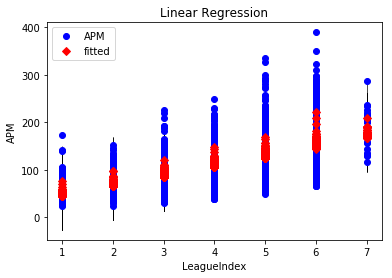

In [31]:
linear_regression("APM","LeagueIndex", "HoursPerWeek")

/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



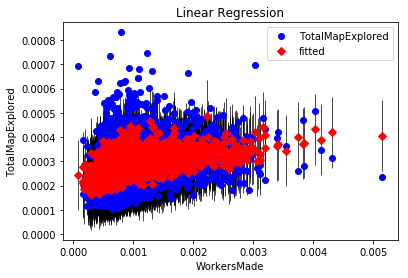

In [32]:
linear_regression('TotalMapExplored','WorkersMade', 'UniqueUnitsMade' )

In [33]:
sc2[:1]

GameID  LeagueIndex   Age  HoursPerWeek  TotalHours      APM  \
0    52.0          5.0  27.0          10.0      3000.0  143.718   

   SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  MinimapAttacks  \
0         0.003515          0.00022       0.000055         0.00011   

       ...       NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
0      ...           0.004849         32.6677        40.8673        4.7508   

   TotalMapExplored  WorkersMade  UniqueUnitsMade  ComplexUnitsMade  \
0           0.00022     0.001397         0.000047               0.0   

   ComplexAbilityUsed  MaxTimeStamp  
0                 0.0      127448.0  

[1 rows x 21 columns]

In [73]:
variable = [ 'LeagueIndex', 'Age', 'HoursPerWeek', 'APM', 'SelectByHotkeys', 'AssignToHotkeys', 
            'UniqueHotkeys', 'TotalMapExplored', 'WorkersMade', 'MaxTimeStamp']
sc2_coef_var = {}

for item in variable:
    mean =np.mean(sc2[item])    
    std = np.std(sc2[item])
    sc2_coef_var[item] = std/50, mean/50, std/mean
   
    #print('mean: ',mean)
    #print('standard deviation: ', std)
    #print('scale: ', std/mean)
    
sc2_coef_var
    
   

{'APM': (0.96209409636470467, 2.2915152665068903, 0.41985061606475305),
 'Age': (0.084114536092106409, 0.4330077890952666, 0.19425640418121962),
 'AssignToHotkeys': (4.1998157845784893e-06,
  7.2829543139604559e-06,
  0.57666375532907022),
 'HoursPerWeek': (0.23925405272181682,
  0.31819053325344515,
  0.75192071327667731),
 'LeagueIndex': (0.028959063721911524,
  0.08241461953265429,
  0.35138260524805764),
 'MaxTimeStamp': (672.06144772936841, 1674.9135290593172, 0.40125142944353598),
 'SelectByHotkeys': (9.451417357511756e-05,
  8.046617578789696e-05,
  1.174582644815259),
 'TotalMapExplored': (1.7276886927050972e-06,
  5.6362005751947274e-06,
  0.30653428132220201),
 'UniqueHotkeys': (7.5248452655290021e-07,
  1.1579926842420612e-06,
  0.64981803148905259),
 'WorkersMade': (1.040576686689434e-05,
  2.0620163630916717e-05,
  0.50464036334282603)}

Text(0,0.5,'Y')

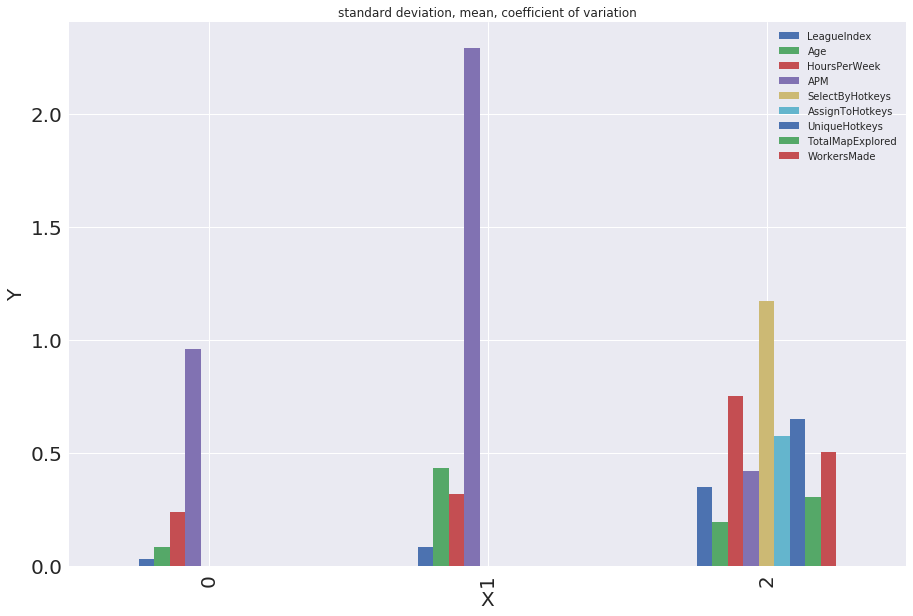

In [139]:
dfs = pd.DataFrame(sc2_coef_var, columns=['LeagueIndex', 'Age', 'HoursPerWeek', 'APM', 'SelectByHotkeys', 'AssignToHotkeys', 
            'UniqueHotkeys', 'TotalMapExplored', 'WorkersMade'])


ax = dfs.plot(kind='bar', title ="standard deviation, mean, coefficient of variation",figsize=(15,10),legend=True, fontsize=20)
ax.set_xlabel("X",fontsize=20)
ax.set_ylabel("Y",fontsize=20)

In [53]:
sc2_clean = sc2[sc2.APM == 0].copy()

In [75]:
''''''n = 0
for i in range(len(sc2.index)):
    apm = sc2.iloc[i]['APM']
    if apm < 2*std+mean or apm > mean - 2*std:
        sc2_clean.iloc[n] = sc2.iloc[i]
        n += 1
        ''''''

SyntaxError: invalid syntax (<ipython-input-75-9e50782d2add>, line 1)

In [76]:
#sc2_clean

In [36]:


from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

def cluster(variable_1, variable_2, x_lower, x_upper, y_lower, y_upper):
    x1 = np.array(sc2[[variable_1]][:1000])
    x2 = np.array(sc2[[variable_2]][:1000])

    plt.plot()
    plt.xlim([x_lower, x_upper])
    plt.ylim([y_lower, y_upper])
    plt.title('Dataset')
    plt.scatter(x1, x2)
    plt.show()

# create new plot and data
    plt.plot()
    X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
    colors = ['b', 'g', 'r']
    markers = ['o', 'v', 's']

# KMeans algorithm 
    K = 3
    kmeans_model = KMeans(n_clusters=K).fit(X)

    plt.plot()
    for i, l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l],ls='None')
        plt.xlim([x_lower, x_upper])
        plt.ylim([y_lower, y_upper])

    plt.show()

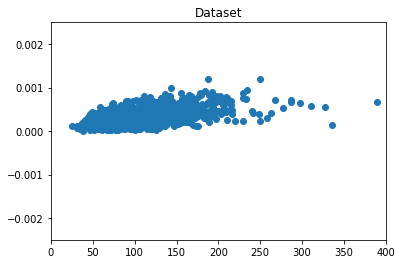

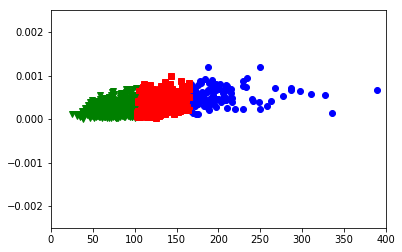

In [37]:
cluster('APM', 'AssignToHotkeys', 0, 400, -.0025, .0025)

# Is apm a good predictor of skill


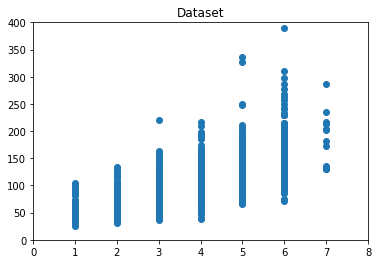

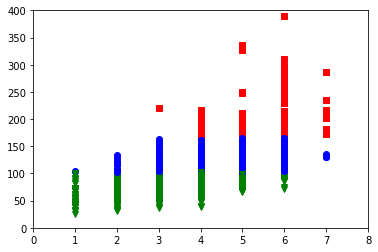

In [38]:
cluster('LeagueIndex', 'APM', 0, 8, 0, 400)

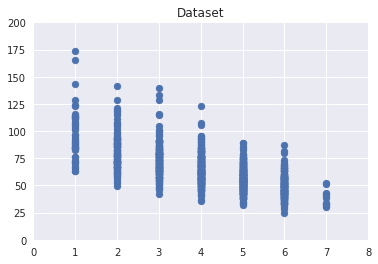

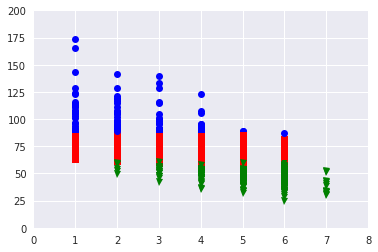

GameID  LeagueIndex   Age  HoursPerWeek  TotalHours      APM  \
0    52.0          5.0  27.0          10.0      3000.0  143.718   

   SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  MinimapAttacks  \
0         0.003515          0.00022       0.000055         0.00011   

       ...       NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
0      ...           0.004849         32.6677        40.8673        4.7508   

   TotalMapExplored  WorkersMade  UniqueUnitsMade  ComplexUnitsMade  \
0           0.00022     0.001397         0.000047               0.0   

   ComplexAbilityUsed  MaxTimeStamp  
0                 0.0      127448.0  

[1 rows x 21 columns]

In [102]:
cluster('LeagueIndex', 'ActionLatency', 0, 8, 0,200)
sc2[:1]

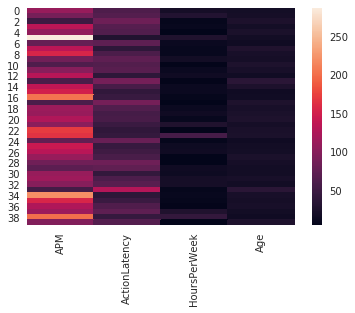

In [131]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
x = clean[['APM', 'ActionLatency','HoursPerWeek', 'Age']]
ax = sns.heatmap(x[:40])


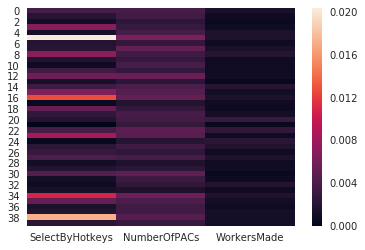

In [132]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
x = clean[['SelectByHotkeys', 'NumberOfPACs','WorkersMade']]
ax = sns.heatmap(x[:40])

In [101]:
clean = sc2.sample(frac=1).reset_index()
